## yt_xarray and cartopy

This notebook demonstrates loading a geographic xarray dataset into yt. In addition to `yt_xarray` and `xarray`, this notebook requires `cartopy` and relies on the netcdf-gridded seismic tomography model of Schmand and Humphreys 2010, available from IRIS [here](https://doi.org/10.17611/DP/9991760).



In [1]:
import xarray as xr
import yt_xarray
import yt
from cartopy.feature import NaturalEarthFeature

yt_xarray provides a simple wrapper of the standard xarray `open_dataset` function that will check yt's `test_data_dir` for data if the file is not found in the local path: 

In [2]:
ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:    (depth: 19, latitude: 93, longitude: 122)
Coordinates:
  * depth      (depth) float32 60.0 90.0 125.0 160.0 ... 700.0 760.0 820.0 885.0
  * latitude   (latitude) float32 27.5 27.75 28.0 28.25 ... 50.0 50.25 50.5
  * longitude  (longitude) float32 -125.8 -125.5 -125.2 ... -96.0 -95.75 -95.5
Data variables:
    dvp        (depth, latitude, longitude) float32 ...
    dvs        (depth, latitude, longitude) float32 ...
Attributes: (12/32)
    title:                         P and S teleseismic body-wave tomography o...
    id:                            wUS-SH-2010_percent
    summary:                       Teleseismic travel-time residuals from the...
    keywords:                      seismic, tomography, compressional wave, p...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    ...                            ...
    author_email:                  bschmandt@unm.edu
    author_institution:            Department of Earth and Planetary Science,...
    author_url:                    
    repository_name:               EMC
    repository_institution:        IRIS DMC
    repository_pid:                doi:10.17611/DP/9991760

to create a yt dataset that loads all the data variables, we simply call `ds.yt.load_grid`. For this dataset, our data is on a stretched grid, meaning the spacing in each dimension varies within a dimension (i.e., the depth spacing is changes), in which case we have to supply the `use_callable=False` flag to explicitly tell yt_xarray that we are OK with loading the data into memory (one of the current limitations of loading stretched grids): 

In [4]:
yt_ds = ds.yt.load_grid(use_callable=False)

yt_xarray : [INFO ] 2023-02-06 15:56:02,810:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2023-02-06 15:56:02,816:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-06 15:56:02,820:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2023-02-06 15:56:03,011 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-06 15:56:03,012 Parameters: domain_dimensions         = [ 18  92 121]
yt : [INFO     ] 2023-02-06 15:56:03,014 Parameters: domain_left_edge          = [  60.     27.5  -125.75]
yt : [INFO     ] 2023-02-06 15:56:03,015 Parameters: domain_right_edge         = [885.   50.5 -95.5]
yt : [INFO     ] 2023-02-06 15:56:03,016 Parameters: cosmological_simulation   = 0


From here, yt will automatically use cartopy when plotting perpendicular to the vertical axis:

yt : [INFO     ] 2023-02-06 15:56:03,137 xlim = -125.750000 -95.500000
yt : [INFO     ] 2023-02-06 15:56:03,137 ylim = 27.500000 50.500000
yt : [INFO     ] 2023-02-06 15:56:03,138 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2023-02-06 15:56:03,139 xlim = -125.750000 -95.500000
yt : [INFO     ] 2023-02-06 15:56:03,140 ylim = 27.500000 50.500000
yt : [INFO     ] 2023-02-06 15:56:03,149 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



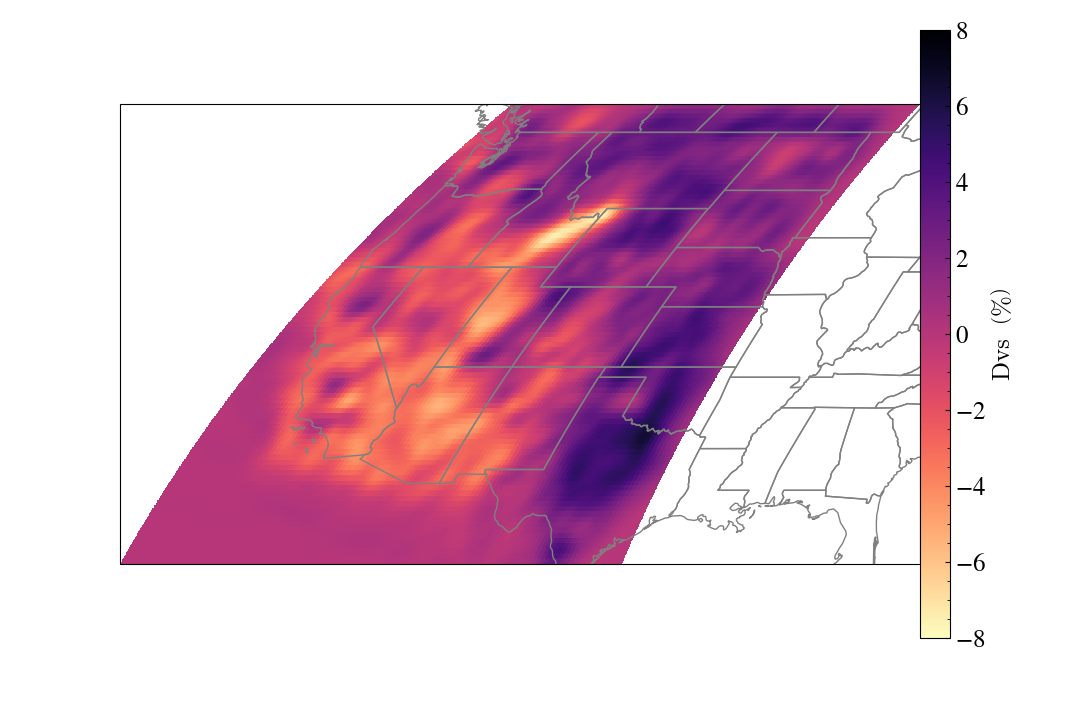

In [5]:
c = yt_ds.domain_center.copy()
c[0] = 150.
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "dvs"), center = c)
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 8)
slc._setup_plots()

states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces')
slc[("stream", "dvs")].axes.add_feature(states, edgecolor='gray')
slc.show()